AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


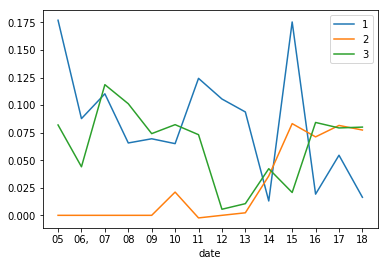

In [57]:
#三张图
import csv
import nltk
from  nltk.text import ConcordanceIndex
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

#上下文结果存储为list。这个函数没用在此处
def concordance_list(ci, word, width=75, lines=25):
    """
    Rewrite of nltk.text.ConcordanceIndex.print_concordance that returns results
    instead of printing them. 

    See:
    http://www.nltk.org/api/nltk.html#nltk.text.ConcordanceIndex.print_concordance
    """
    half_width = (width - len(word) - 2) // 2
    context = width // 4 # approx number of words of context

    results = []
    offsets = ci.offsets(word)
    if offsets:
        lines = min(lines, len(offsets))
        for i in offsets:
            if lines <= 0:
                break
            left = (' ' * half_width +
                    ' '.join(ci._tokens[i-context:i]))
            right = ' '.join(ci._tokens[i+1:i+context])
            left = left[-half_width:]
            right = right[:half_width]
            results.append('%s %s %s' % (left, ci._tokens[i], right))
            lines -= 1
    return results

#上下文结果存储为str
def concordance_str(ci, word, width=75, lines=25):
    half_width = (width - len(word) - 2) // 2
    context = width // 4 # approx number of words of context
    results = ""
    offsets = ci.offsets(word)
    if offsets:
        lines = min(lines, len(offsets))
        for i in offsets:
            if lines <= 0:
                break
            left = (' ' * half_width +
                    ' '.join(ci._tokens[i-context:i]))
            right = ' '.join(ci._tokens[i+1:i+context])
            left = left[-half_width:]
            right = right[:half_width]
            results= results + left+ " "+ ci._tokens[i]+ " "+ right+"\n"
            lines -= 1
    return results

#情感分数评分
def cord_sentiment_YY_p(readFilename,outFilename):
    cords=[]
    #读取csv
    with open(readFilename,encoding= u'utf-8',errors='ignore') as f:
        reader = csv.reader(f)
        #遍历每行
        for row in reader:
            #每条记录的段落筛选
            cord={}
            #编码问题，不得不重新编码解码。
            cord['date']=row[1].encode('utf-8').decode('utf-8-sig')
            title=row[0].encode('utf-8').decode('utf-8-sig')
            cord['title'] = title.replace('\n',' ')
            item = row[3].encode('utf-8').decode('utf-8-sig')
            #英文分词
            title_tokens = nltk.word_tokenize(cord['title'].lower())
            tokens = nltk.word_tokenize(item.lower())
            text = nltk.Text(tokens)
            #建立索引
            ci = ConcordanceIndex(text)
            #如果题目中出现china或chinese则全文输出
            if 'china' in title_tokens or 'chinese' in title_tokens:
                cord['cord'] = "full-content: "+ row[3].replace("\n"," ")
            #否则 只输出出现china或chinese的上下文
            else:
                cord['cord'] =concordance_str(ci,'china', width=750,lines=25)+concordance_str(ci,'chinese', width=750,lines=25)
            blob = TextBlob(cord['cord'])
    #         print(cord['cord'])
            cord['polarity'] = blob.sentiment.polarity
            cord['subjectivity'] = blob.sentiment.subjectivity
            cords.append(cord)       
    df = pd.DataFrame(cords)
    df = df[['title','date','cord','polarity','subjectivity']]
    df.drop(df.index[[0]], inplace=True)
    p_group=df['polarity'].groupby(df['date'])
    df_p = p_group.mean()
    print(df_p.plot())
    plt.legend(loc='best')

    s_group=df['subjectivity'].groupby(df['date'])
    df.to_csv(outFilename,index=False,encoding="utf-8")


# cord_sentiment("1.csv","1_sentiment.csv")
# cord_sentiment("2.csv","2_sentiment.csv")
# cord_sentiment("3.csv","3_sentiment.csv")
cord_sentiment_YY_p("1_YY.csv","1_YY_sentiment.csv")
cord_sentiment_YY_p("2_YY.csv","2_YY_sentiment.csv")
cord_sentiment_YY_p("3_YY.csv","3_YY_sentiment.csv")
# cord_sentiment_YY_p("4_YY.csv","4_YY_sentiment.csv")
m=['05','06,','07','08','09','10','11','12','13','14','15','16','17','18']
m_range = range(len(m))
plt.xticks(m_range,m)
plt.legend(['1','2','3'])

date
05     2
06     5
07    10
08     7
09     5
10     5
11     5
12     1
13     2
14     2
15     3
16    42
17    16
18    22
Name: polarity, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
date
05     1
06     1
07     1
08    16
09     1
10    31
11    21
12     7
13    19
14     7
15    19
16    63
17    48
18    45
Name: polarity, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
date
05     5
06    13
07     8
08    16
09    18
10    29
11    20
12    83
13    54
14    69
15    38
16    35
17    63
18    87
Name: polarity, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


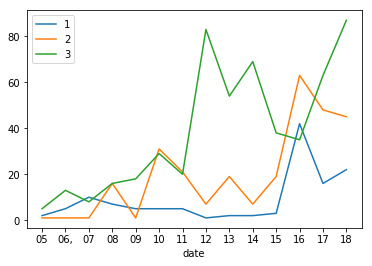

In [58]:
#报道数量
def cord_sentiment_YY_size(readFilename,outFilename):
    cords=[]
    #读取csv
    with open(readFilename,encoding= u'utf-8',errors='ignore') as f:
        reader = csv.reader(f)
        #遍历每行
        for row in reader:
            #每条记录的段落筛选
            cord={}
            #编码问题，不得不重新编码解码。
            cord['date']=row[1].encode('utf-8').decode('utf-8-sig')
            title=row[0].encode('utf-8').decode('utf-8-sig')
            cord['title'] = title.replace('\n',' ')
            item = row[3].encode('utf-8').decode('utf-8-sig')
            #英文分词
            title_tokens = nltk.word_tokenize(cord['title'].lower())
            tokens = nltk.word_tokenize(item.lower())
            text = nltk.Text(tokens)
            #建立索引
            ci = ConcordanceIndex(text)
            #如果题目中出现china或chinese则全文输出
            if 'china' in title_tokens or 'chinese' in title_tokens:
                cord['cord'] = "full-content: "+ row[3].replace("\n"," ")
            #否则 只输出出现china或chinese的上下文
            else:
                cord['cord'] =concordance_str(ci,'china', width=750,lines=25)+concordance_str(ci,'chinese', width=750,lines=25)
            blob = TextBlob(cord['cord'])
    #         print(cord['cord'])
            cord['polarity'] = blob.sentiment.polarity
            cord['subjectivity'] = blob.sentiment.subjectivity
            cords.append(cord)       
    df = pd.DataFrame(cords)
    df = df[['title','date','cord','polarity','subjectivity']]
    df.drop(df.index[[0]], inplace=True)
    p_group=df['polarity'].groupby(df['date'])
    df_p = p_group.mean()
    newdata=df.groupby('date')
    df_p_s = p_group.size()
    print(df_p_s)
    print(df_p_s.plot())
    plt.legend(loc='best')
    s_group=df['subjectivity'].groupby(df['date'])
    df.to_csv(outFilename,index=False,encoding="utf-8")


cord_sentiment_YY_size("1_YY.csv","1_YY_sentiment.csv")
cord_sentiment_YY_size("2_YY.csv","2_YY_sentiment.csv")
cord_sentiment_YY_size("3_YY.csv","3_YY_sentiment.csv")
# cord_sentiment_YY_size("4_YY.csv","4_YY_sentiment.csv")
m=['05','06,','07','08','09','10','11','12','13','14','15','16','17','18']
m_range = range(len(m))
plt.xticks(m_range,m)
plt.legend(['1','2','3'])

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


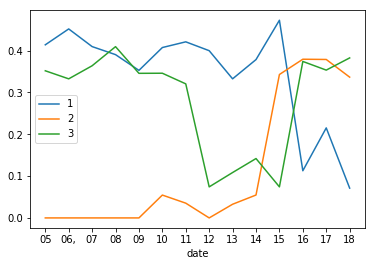

In [60]:
#报道subjectivity 主观度
def cord_sentiment_YY_sub(readFilename,outFilename):
    cords=[]
    #读取csv
    with open(readFilename,encoding= u'utf-8',errors='ignore') as f:
        reader = csv.reader(f)
        #遍历每行
        for row in reader:
            #每条记录的段落筛选
            cord={}
            #编码问题，不得不重新编码解码。
            cord['date']=row[1].encode('utf-8').decode('utf-8-sig')
            title=row[0].encode('utf-8').decode('utf-8-sig')
            cord['title'] = title.replace('\n',' ')
            item = row[3].encode('utf-8').decode('utf-8-sig')
            #英文分词
            title_tokens = nltk.word_tokenize(cord['title'].lower())
            tokens = nltk.word_tokenize(item.lower())
            text = nltk.Text(tokens)
            #建立索引
            ci = ConcordanceIndex(text)
            #如果题目中出现china或chinese则全文输出
            if 'china' in title_tokens or 'chinese' in title_tokens:
                cord['cord'] = "full-content: "+ row[3].replace("\n"," ")
            #否则 只输出出现china或chinese的上下文
            else:
                cord['cord'] =concordance_str(ci,'china', width=750,lines=25)+concordance_str(ci,'chinese', width=750,lines=25)
            blob = TextBlob(cord['cord'])
    #         print(cord['cord'])
            cord['polarity'] = blob.sentiment.polarity
            cord['subjectivity'] = blob.sentiment.subjectivity
            cords.append(cord)       
    df = pd.DataFrame(cords)
    df = df[['title','date','cord','polarity','subjectivity']]
    df.drop(df.index[[0]], inplace=True)
    s_group=df['subjectivity'].groupby(df['date'])
    df_s = s_group.mean()
    print(df_s.plot())
    df.to_csv(outFilename,index=False,encoding="utf-8")


# cord_sentiment("1.csv","1_sentiment.csv")
# cord_sentiment("2.csv","2_sentiment.csv")
# cord_sentiment("3.csv","3_sentiment.csv")
cord_sentiment_YY_sub("1_YY.csv","1_YY_sentiment.csv")
cord_sentiment_YY_sub("2_YY.csv","2_YY_sentiment.csv")
cord_sentiment_YY_sub("3_YY.csv","3_YY_sentiment.csv")
# cord_sentiment_YY_sub("4_YY.csv","4_YY_sentiment.csv")
m=['05','06,','07','08','09','10','11','12','13','14','15','16','17','18']
m_range = range(len(m))
plt.xticks(m_range,m)
plt.legend(['1','2','3'])